In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
pd.set_option('display.float_format', lambda x:'%.3f' % x)
import warnings
warnings.simplefilter(action="ignore", category=Warning) # Ignore warnings

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sb

# Configure default settings for plots
sb.set(style='ticks')
sb.set_palette('Paired')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.model_selection import GridSearchCV
# Data Processing Librariies
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

## Algorithms
# Ensemble Methods
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Non-linear Methods
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Performance Metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay

In [2]:
raw_data = pd.read_csv('Crop_Recommendation.csv')

In [3]:
raw_data.head(10)

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.880,82.003,6.503,202.936,Rice
1,85,58,41,21.770,80.320,7.038,226.656,Rice
2,60,55,44,23.004,82.321,7.840,263.964,Rice
3,74,35,40,26.491,80.158,6.980,242.864,Rice
4,78,42,42,20.130,81.605,7.628,262.717,Rice
5,69,37,42,23.058,83.370,7.073,251.055,Rice
6,69,55,38,22.709,82.639,5.701,271.325,Rice
7,94,53,40,20.278,82.894,5.719,241.974,Rice
8,89,54,38,24.516,83.535,6.685,230.446,Rice
9,68,58,38,23.224,83.033,6.336,221.209,Rice


In [10]:
raw_data.tail()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
2195,107,34,32,26.775,66.413,6.780,177.775,Coffee
2196,99,15,27,27.417,56.636,6.087,127.925,Coffee
2197,118,33,30,24.132,67.225,6.363,173.323,Coffee
2198,117,32,34,26.272,52.127,6.759,127.175,Coffee
2199,104,18,30,23.603,60.396,6.780,140.937,Coffee


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
raw_data.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
count,2200.000,2200.000,2200.000,2200.000,2200.000,2200.000,2200.000
mean,50.552,53.363,48.149,25.616,71.482,6.469,103.464
std,36.917,32.986,50.648,5.064,22.264,0.774,54.958
min,0.000,5.000,5.000,8.826,14.258,3.505,20.211
25%,21.000,28.000,20.000,22.769,60.262,5.972,64.552
50%,37.000,51.000,32.000,25.599,80.473,6.425,94.868
75%,84.250,68.000,49.000,28.562,89.949,6.924,124.268
max,140.000,145.000,205.000,43.675,99.982,9.935,298.560


In [6]:
raw_data.shape

(2200, 8)

In [7]:
raw_data.isnull().sum(axis=0)

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

In [8]:
df = raw_data.copy()

In [11]:
count = df.isnull().sum()[df.isnull().sum() > 0]
percentage = (count / df.shape[0]) * 100

print(count.shape[0], 'columns has missing values')
print('-'*50)
print(pd.DataFrame({'Count':count, 'Percentage %':percentage}))

0 columns has missing values
--------------------------------------------------
Empty DataFrame
Columns: [Count, Percentage %]
Index: []


In [12]:
df.sample(20, random_state=101)

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
1124,38,15,30,28.919,48.140,5.076,97.013,Mango
235,28,58,81,17.475,16.543,6.180,93.350,ChickPea
585,11,40,23,29.613,63.047,5.804,50.198,MothBeans
1469,95,30,52,29.481,90.337,6.640,26.037,Muskmelon
2066,77,48,36,25.867,84.100,7.360,154.839,Jute
189,92,60,23,18.667,71.516,5.722,69.933,Maize
2141,80,30,25,26.241,65.644,7.487,148.377,Coffee
1948,122,40,17,24.964,81.317,6.855,80.040,Cotton
1261,22,133,201,23.820,80.122,6.003,67.274,Grapes
321,19,65,25,18.096,18.293,5.625,144.790,KidneyBeans


In [13]:
df.duplicated().sum()

0

In [14]:
df.dtypes

Nitrogen         int64
Phosphorus       int64
Potassium        int64
Temperature    float64
Humidity       float64
pH_Value       float64
Rainfall       float64
Crop            object
dtype: object

In [15]:
features = df.columns[:-1]
features

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall'],
      dtype='object')

In [16]:
target='Crop'

In [17]:
df.nunique()

Nitrogen        137
Phosphorus      117
Potassium        73
Temperature    2200
Humidity       2200
pH_Value       2200
Rainfall       2200
Crop             22
dtype: int64

In [18]:
def plot_counts(data, features, hue=None):
    
    """
    This function takes the name of the feature and plots the distribution
    of the categorical values and saves the figure for future usage using
    countplot function of seaborn.

    ---
    ### Parameters:
    - data <dataframe>: tabular data in data frame format.
    - features <list>: List of categorical columns in dataframe to be visualized.
    - hue <string>: Name of the hue.
    """
    
    # number of columns of the subplots
    n_cols = 2 
    # set the number of rows with the predefined number of columns
    n_rows = int(np.ceil(len(features)/n_cols)) 

    # Create figure
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
    # Flatten the axes array for easier indexing
    axes = axes.flatten()

    for i, feature in enumerate(features):
        #bar_container = axes[i].bar(df[feature].value_counts().index, df[feature].value_counts().values)
        sb.countplot(
            data = data,
            x = feature,
            palette = 'Paired',
            hue = hue,
            ax = axes[i]
        )
        # Display count of each level of the category
        for p in axes[i].patches:
            label = p.get_height()
            x = p.get_x() + p.get_width() / 2 # Width of the plot
            y = p.get_height() # Height of the plot
            
            rotation = 0
            if hue is not None:
                rotation = 30  # Rotate annotations by 30 degrees if hue is not None

            axes[i].annotate(
                '{:.0f}'.format(label),
                (x, y),
                ha = 'center',
                va = 'center',
                size = 12,
                xytext = (0, 5),
                textcoords = 'offset points',
                rotation = rotation
            )
            
        axes[i].set(ylabel='Count', title=feature, xlabel='')
        axes[i].tick_params(axis='x', rotation=30)

    # If the number of features is odd, remove the empty subplot
    if len(features) % 2 != 0:
        fig.delaxes(axes[-1])

    plt.tight_layout()
    plt.show()

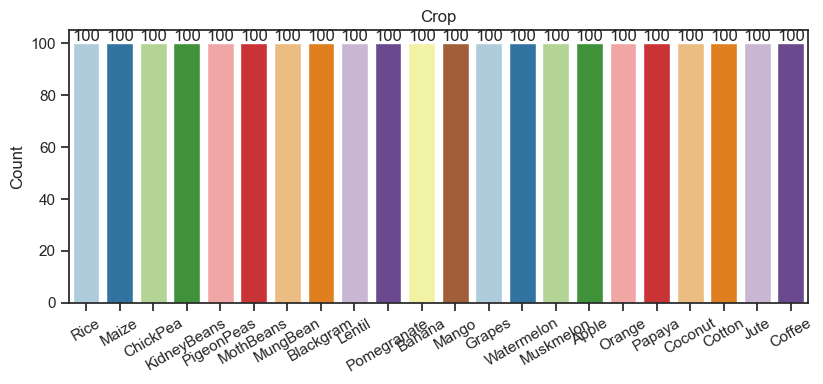

In [19]:
plot_counts(df, [target])


In [20]:
def dist_plot(data, feature_list):
    # number of columns of the subplots
    n_cols = 2 
    # set the number of rows with the predefined number of columns
    n_rows = int(np.ceil(len(feature_list)/n_cols)) 

    # Create figure
    fig = plt.figure(figsize=(16, 4*n_rows))
    outer = gridspec.GridSpec(n_rows, n_cols, wspace=0.2, hspace=0.3)

    for i in range(len(feature_list)):
        inner = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer[i], 
                                                 wspace=0.1, hspace=0.1, height_ratios=(0.15, 0.85))

        ax_box = plt.Subplot(fig, inner[0])
        sb.boxplot(data=data, x=feature_list[i], color='lightblue', ax=ax_box)
        ax_box.set_xlabel('')
        fig.add_subplot(ax_box)

        mean_value = data[feature_list[i]].mean()
        median_value = data[feature_list[i]].median()
        ax_hist = plt.Subplot(fig, inner[1])
        sb.histplot(data=data, x=feature_list[i], kde=True, ax=ax_hist)
        ax_hist.axvline(mean_value, color='green', linestyle='dotted', linewidth=2, label='Mean')
        ax_hist.axvline(median_value, color='purple', linestyle='dotted', linewidth=2, label='Median')
        # Add a legend
        ax_hist.legend(loc='lower right', fontsize=10)

        # Calculate skewness and kurtosis
        skewness = data[feature_list[i]].skew()
        kurt = data[feature_list[i]].kurt()
        if skewness < 0:
            x=0.25
        else:
            x=0.95
        # Add skewness and kurtosis as text on the histogram plot
        ax_hist.text(x, 0.85, f"Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}", 
                         transform=ax_hist.transAxes, verticalalignment='top', horizontalalignment='right',
                         bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'),
                    fontsize=10)
        fig.add_subplot(ax_hist)

    plt.tight_layout()
    plt.show(block=False)


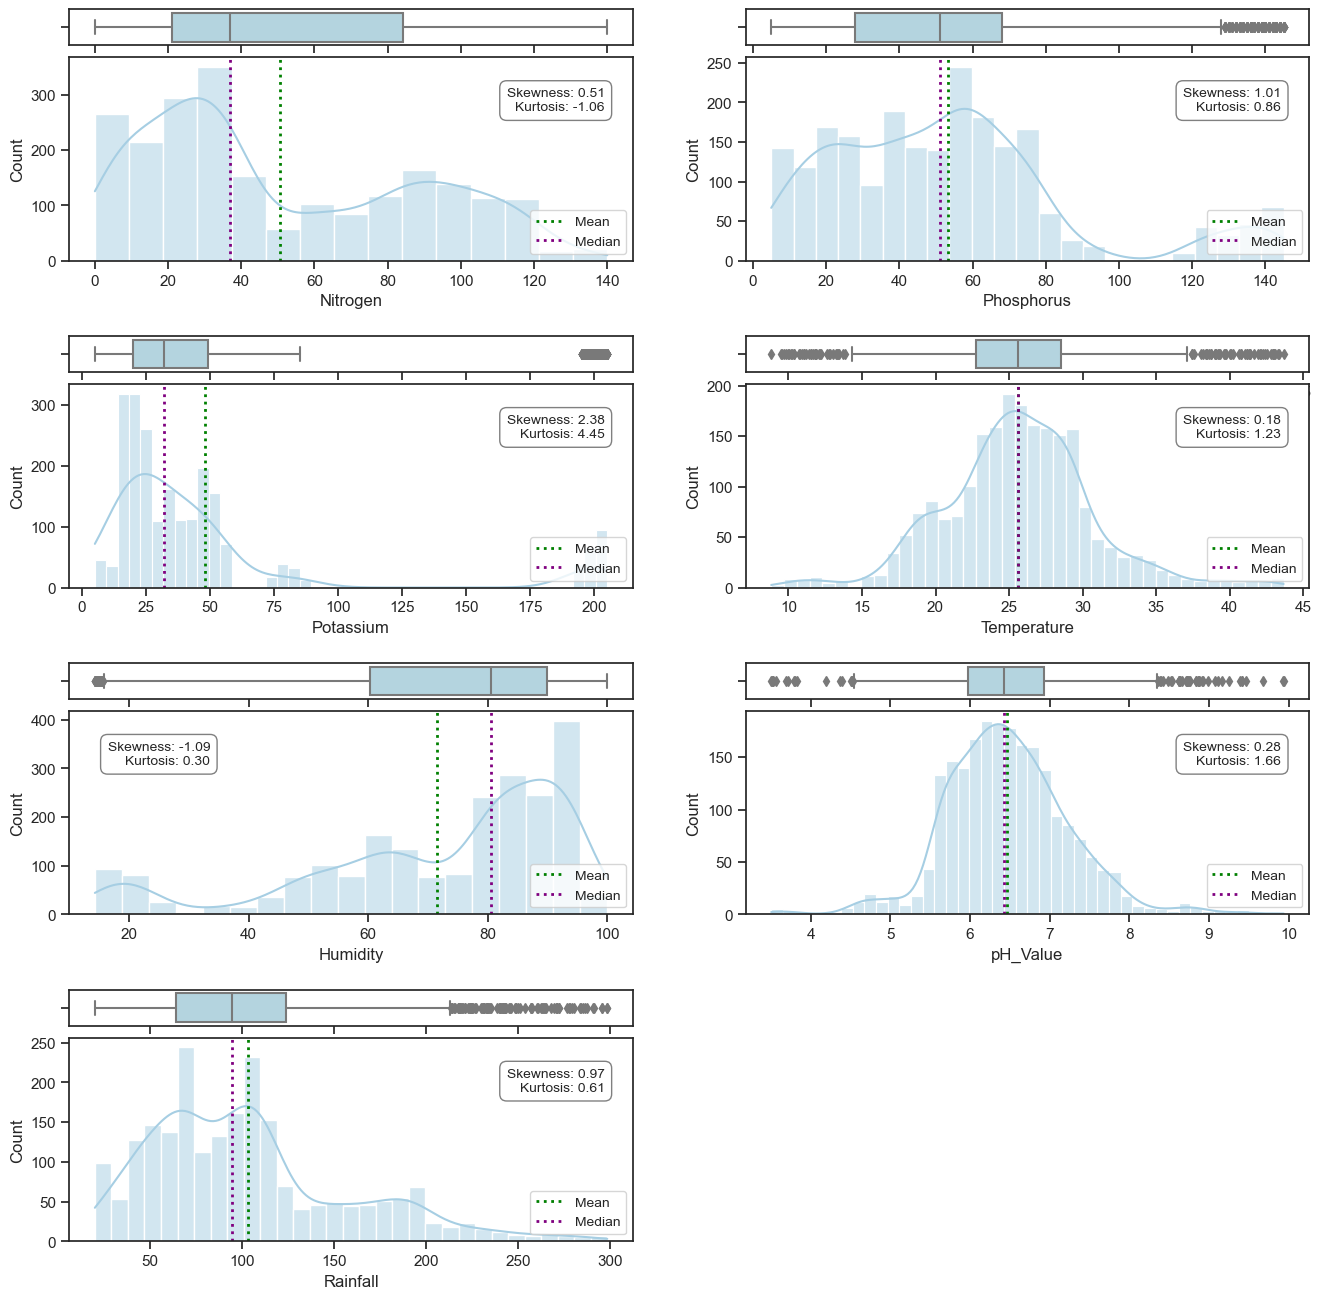

In [21]:
dist_plot(df, features)

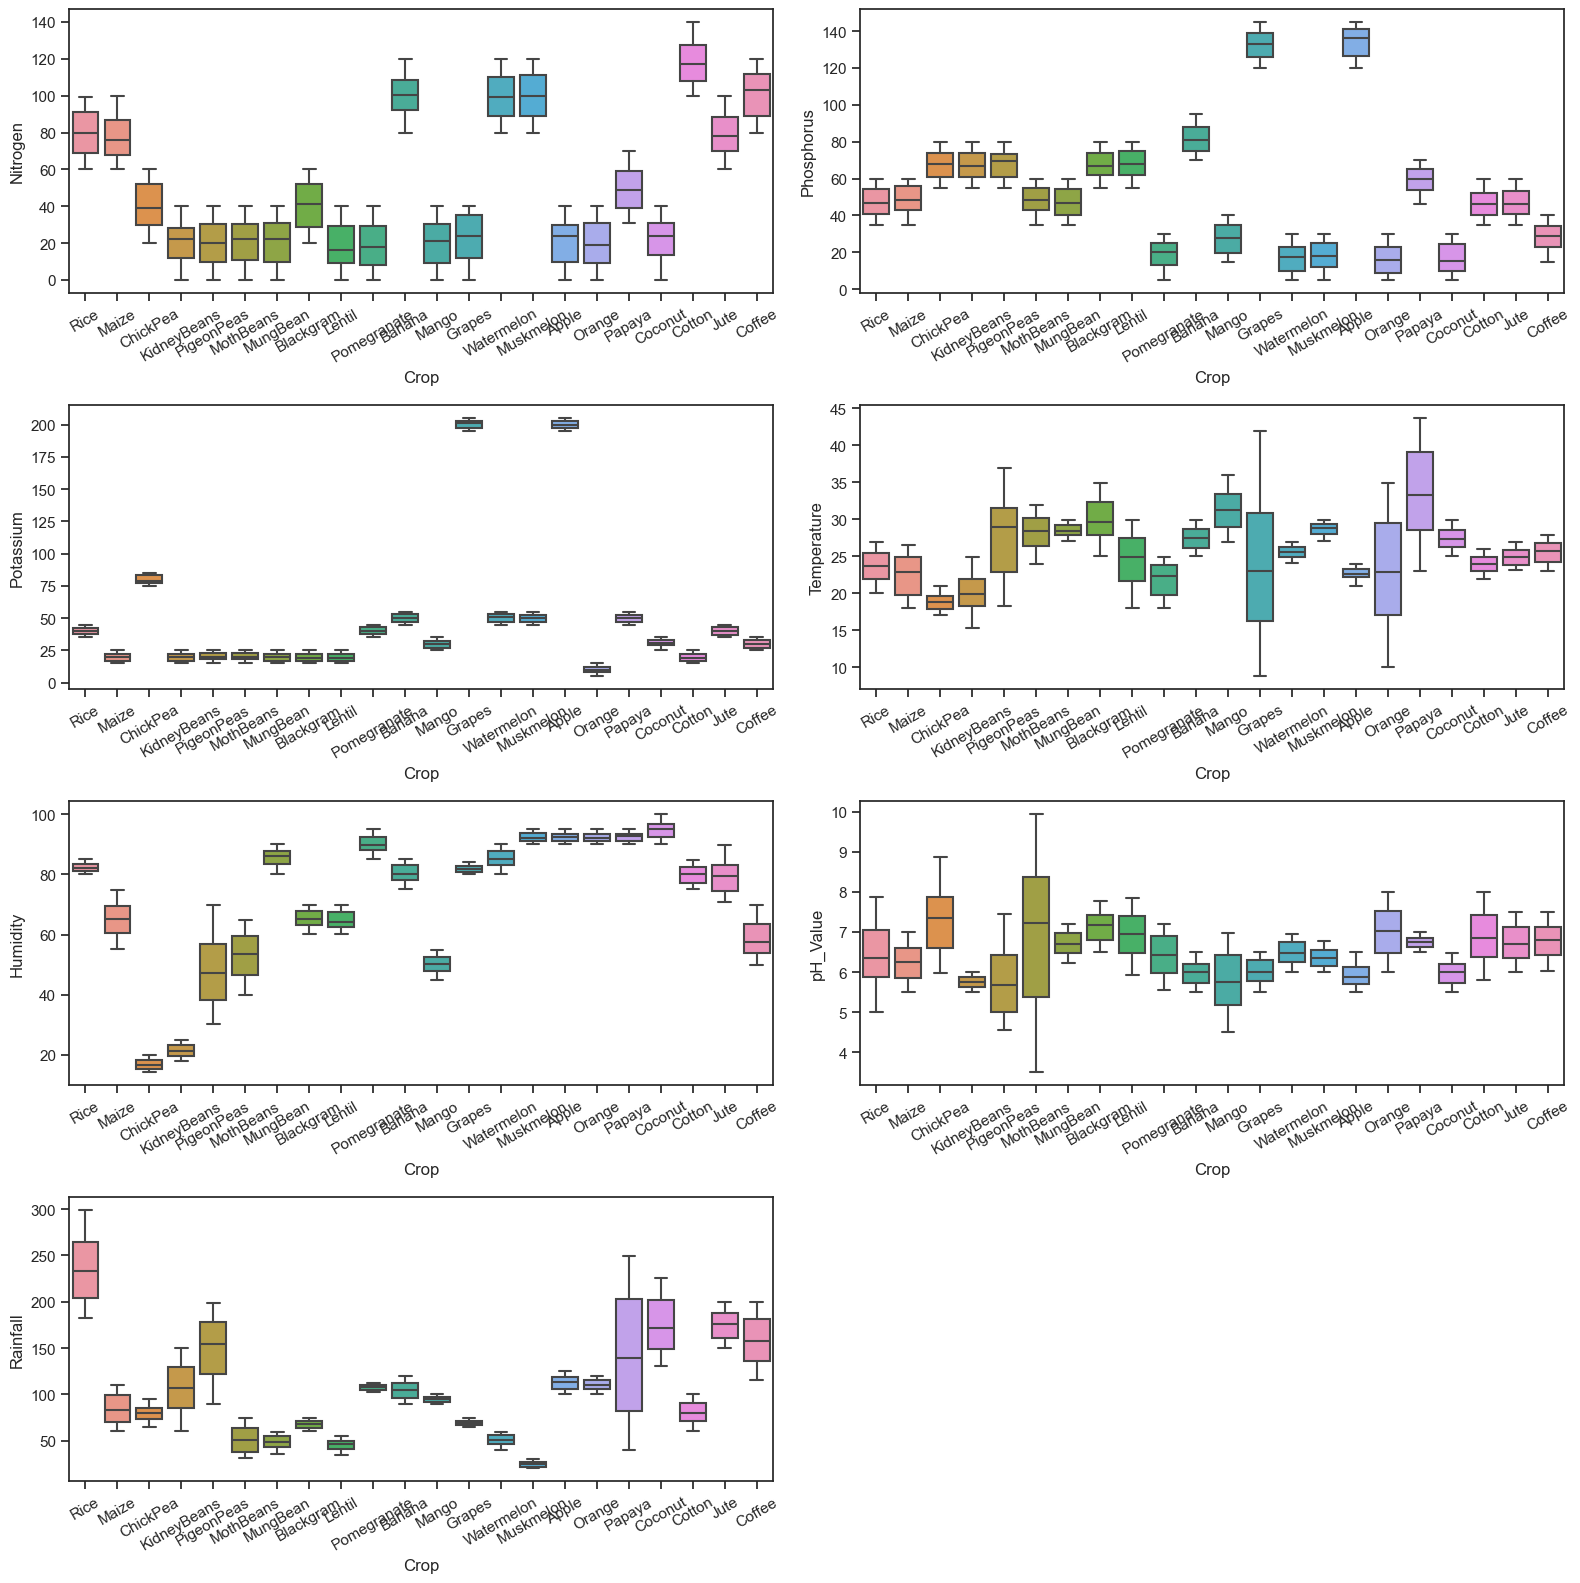

In [22]:
# number of columns of the subplots
n_cols = 2 
# set the number of rows with the predefined number of columns
n_rows = int(np.ceil(len(features)/n_cols)) 

# Create figure
fig, ax = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
# Flatten the axes array for easier indexing
ax = ax.flatten()
    
for i, feature in enumerate(features):
    sb.boxplot(data=df, x=target, y=feature, ax=ax[i])
    ax[i].tick_params(axis='x', rotation=30)
# If the number of features is odd, remove the empty subplot
if len(features) % 2 != 0:
    fig.delaxes(ax[-1])
    
plt.tight_layout()
plt.show(block=False)

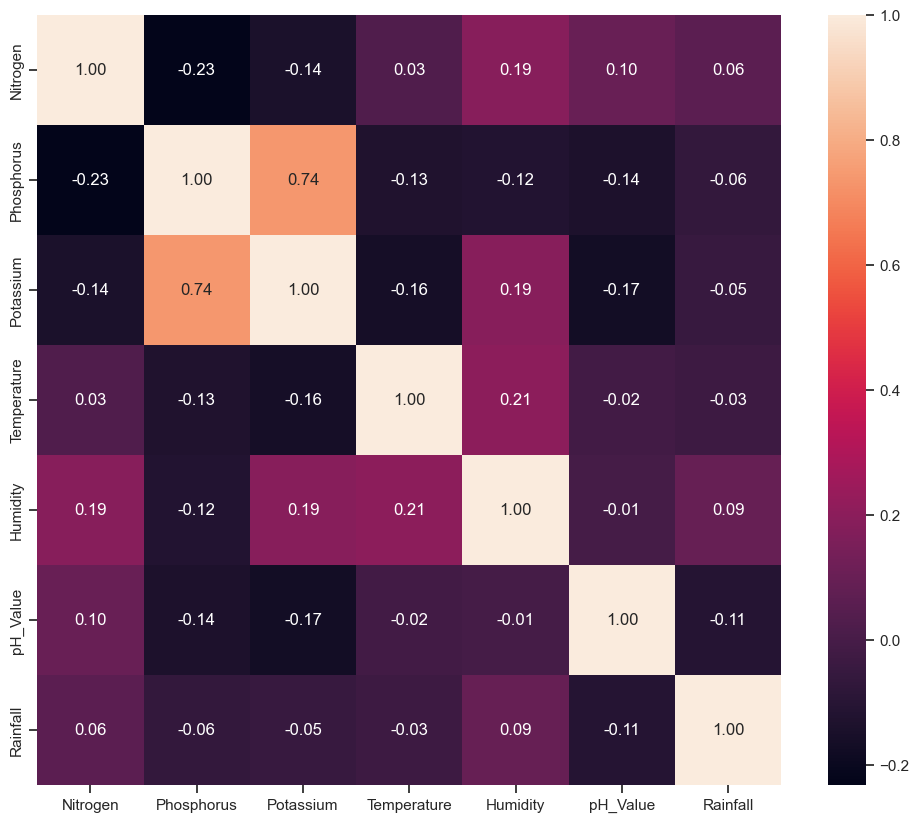

In [23]:
plt.figure(figsize=(12, 10))
sb.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f')
plt.show()

In [24]:
type(features)

pandas.core.indexes.base.Index

In [25]:
df.drop('Phosphorus', axis=1, inplace=True)
features = features.tolist()
features.remove('Phosphorus')
print(features)

['Nitrogen', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']


In [26]:
# Calculate the first quartile (Q1) and third quartile (Q3) for the selected features
Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)

# Calculate the interquartile range (IQR) for the selected features
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers for the selected features
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers for the selected features
outliers = (df[features] < lower_bound) | (df[features] > upper_bound)

# Remove outliers for the selected features
df_no_outliers = df[~outliers.any(axis=1)]

df_no_outliers.reset_index(inplace=True, drop=True)

# Display the cleaned dataframe's info
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     1768 non-null   int64  
 1   Potassium    1768 non-null   int64  
 2   Temperature  1768 non-null   float64
 3   Humidity     1768 non-null   float64
 4   pH_Value     1768 non-null   float64
 5   Rainfall     1768 non-null   float64
 6   Crop         1768 non-null   object 
dtypes: float64(4), int64(2), object(1)
memory usage: 96.8+ KB


In [27]:
df_no_outliers[target].value_counts()


Crop
Banana         100
Lentil         100
Jute           100
Cotton         100
Muskmelon      100
Watermelon     100
Maize          100
Pomegranate    100
Coffee         100
Blackgram      100
MungBean       100
PigeonPeas     100
KidneyBeans    100
Mango           98
Coconut         85
Orange          83
MothBeans       58
ChickPea        58
Papaya          54
Rice            32
Name: count, dtype: int64

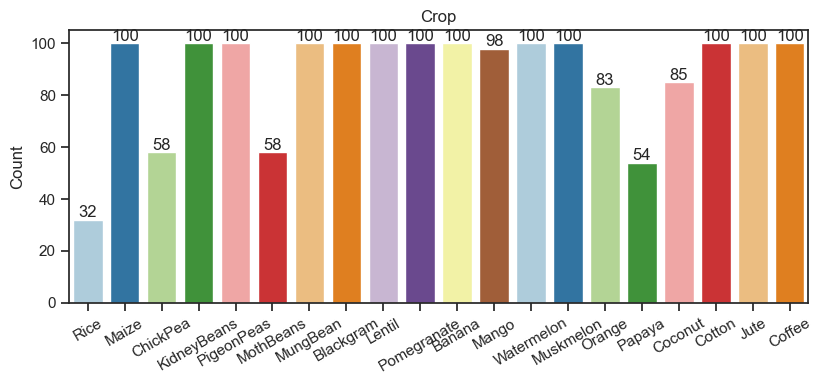

In [28]:
plot_counts(df_no_outliers, [target])


In [29]:
# Get unique values of the column in the first dataframe
unique_values_df1 = df[target].unique()

# Get unique values of the column in the second dataframe
unique_values_df2 = df_no_outliers[target].unique()

# Compare unique values
common_values = set(unique_values_df1) & set(unique_values_df2)
unique_values_only_in_df1 = set(unique_values_df1) - set(unique_values_df2)
unique_values_only_in_df2 = set(unique_values_df2) - set(unique_values_df1)

print("Common unique values:", common_values)
print("Unique values only in df1:", unique_values_only_in_df1)
print("Unique values only in df2:", unique_values_only_in_df2)

Common unique values: {'Banana', 'Mango', 'Coconut', 'Blackgram', 'Watermelon', 'Muskmelon', 'Lentil', 'Orange', 'Coffee', 'Cotton', 'Maize', 'PigeonPeas', 'ChickPea', 'KidneyBeans', 'Papaya', 'Jute', 'MungBean', 'Rice', 'MothBeans', 'Pomegranate'}
Unique values only in df1: {'Grapes', 'Apple'}
Unique values only in df2: set()


In [32]:
from scipy.stats import boxcox, yeojohnson
from sklearn.preprocessing import QuantileTransformer

In [33]:
def transform_data(df, target, num_features):
    # Encoding target
    lbl_encoder = LabelEncoder()
    df[target+'_Encoded'] = lbl_encoder.fit_transform(df[target])
    
    # Assign features and labels
    x = df.drop([target, target+'_Encoded'], axis=1)
    y = df[target+'_Encoded']
    
    # Split the dataset into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)
    
    # Access the encoded classes
    encoded_classes = lbl_encoder.classes_
    # Print the mapping (index corresponds to encoded value, value is the original label)
    for i, label in enumerate(encoded_classes):
        print(f"Encoded Value: {i}, Original Label: {label}")    
    
    # Standardization and Encoding
    # Define transformers for different column types
    std_scaler = StandardScaler()
    quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=0)

    # Combine transformers for specific columns
    preprocessor = ColumnTransformer([
        ("num", std_scaler, num_features),
        ("num_trns", quantile_transformer, num_features)
    ])

    # Fit transformers on training data only
    preprocessor.fit(x_train)

    # Transform train and test data using fitted transformers
    x_train_transformed = preprocessor.transform(x_train)
    x_test_transformed = preprocessor.transform(x_test)
    
    return x_train_transformed, x_test_transformed, y_train, y_test

In [34]:
x_train, x_test, y_train, y_test = transform_data(df, target, features)


Encoded Value: 0, Original Label: Apple
Encoded Value: 1, Original Label: Banana
Encoded Value: 2, Original Label: Blackgram
Encoded Value: 3, Original Label: ChickPea
Encoded Value: 4, Original Label: Coconut
Encoded Value: 5, Original Label: Coffee
Encoded Value: 6, Original Label: Cotton
Encoded Value: 7, Original Label: Grapes
Encoded Value: 8, Original Label: Jute
Encoded Value: 9, Original Label: KidneyBeans
Encoded Value: 10, Original Label: Lentil
Encoded Value: 11, Original Label: Maize
Encoded Value: 12, Original Label: Mango
Encoded Value: 13, Original Label: MothBeans
Encoded Value: 14, Original Label: MungBean
Encoded Value: 15, Original Label: Muskmelon
Encoded Value: 16, Original Label: Orange
Encoded Value: 17, Original Label: Papaya
Encoded Value: 18, Original Label: PigeonPeas
Encoded Value: 19, Original Label: Pomegranate
Encoded Value: 20, Original Label: Rice
Encoded Value: 21, Original Label: Watermelon


In [35]:
def model_comparison(x, y, models):
    '''
        This function takes x, y and models and applies 
        k-fold cross validation to the each algorithm in 
        the models list by using x and y training set. 
        Displays the mean and standard deviation of 
        accuracy, precision, recall, f1 scores in tabular
        format and boxplots.

        ---
        ### Parameters
        - x <array>: Feature values.
        - y <array>: Target values.
        - models <list>: List of the model objects to be vealuated.
    '''
    
    names = []
    scoring = ['accuracy']
    
    # Create a dataframe to store the different metric values for each algorithm
    df_results = pd.DataFrame(columns=['Algorithm', 'Acc Mean', 'Acc STD'])
    results_acc = [] # List of accuracy scores for each fold of each algorithm
    
    for name, model in models:
        names.append(name)
        kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)
        result = cross_validate(model, x, y, cv=kfold, scoring=scoring)
    
        # Mean and standard deviation of Accuracy scores for the algorithm
        acc_mean = result['test_accuracy'].mean()
        acc_std = result['test_accuracy'].std()
        
        # Create the row of the results
        df_result_row = {'Algorithm': name, 'Acc Mean': acc_mean, 'Acc STD': acc_std}
        # Add the row to the results data frame
        df_results = pd.concat([df_results, pd.DataFrame([df_result_row])], ignore_index=True)
        
        results_acc.append(result['test_accuracy'])
        
    df_results = df_results.set_index('Algorithm')
    pd.set_option('display.float_format', lambda x: '%.3f' % x)
    # Display the mean and standard deviation of all metrics for all algorithms
    print(df_results)
    
    # Display the overall results in a boxplot graph
    width = (len(models)*2)
    plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(width, 6))
    fig, ax = plot_objects
    
    ax.boxplot(results_acc)
    ax.set_title('Accuracy', fontsize=14)
    ax.set_xticklabels(names, rotation=30)
    plt.tight_layout()
    plt.show()

In [36]:
ens_models = []
ens_models.append(('RFC', RandomForestClassifier()))
ens_models.append(('ABC', AdaBoostClassifier()))
ens_models.append(('GBC', GradientBoostingClassifier()))

           Acc Mean  Acc STD
Algorithm                   
RFC           0.989    0.008
ABC           0.145    0.018
GBC           0.987    0.007


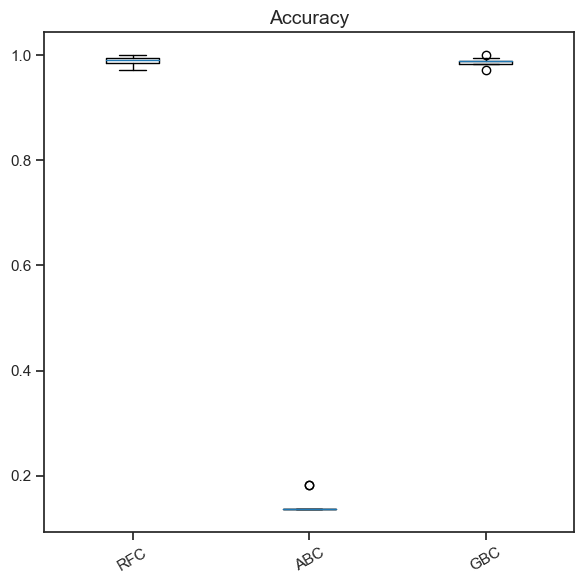

In [37]:
model_comparison(x_train, y_train, ens_models)

In [38]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [39]:
y_hat = model.predict(x_test)


In [40]:
print(classification_report(y_test, y_hat))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.86      0.90      0.88        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00        20
          17       1.00    

In [41]:
def plot_confusion_matrix(y_test, predictions):
    # Plot the confusion matrix
    cf_matrix = confusion_matrix(y_test, predictions)
    fig = plt.subplots(figsize=(10, 8))
    sb.set(font_scale=1.4)
    sb.heatmap(cf_matrix, annot=True, fmt='d')
    plt.xlabel('Predicted Label', fontsize=12)
    plt.xticks(fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()
    
    # Reset font scale to default
    sb.set(font_scale=1)

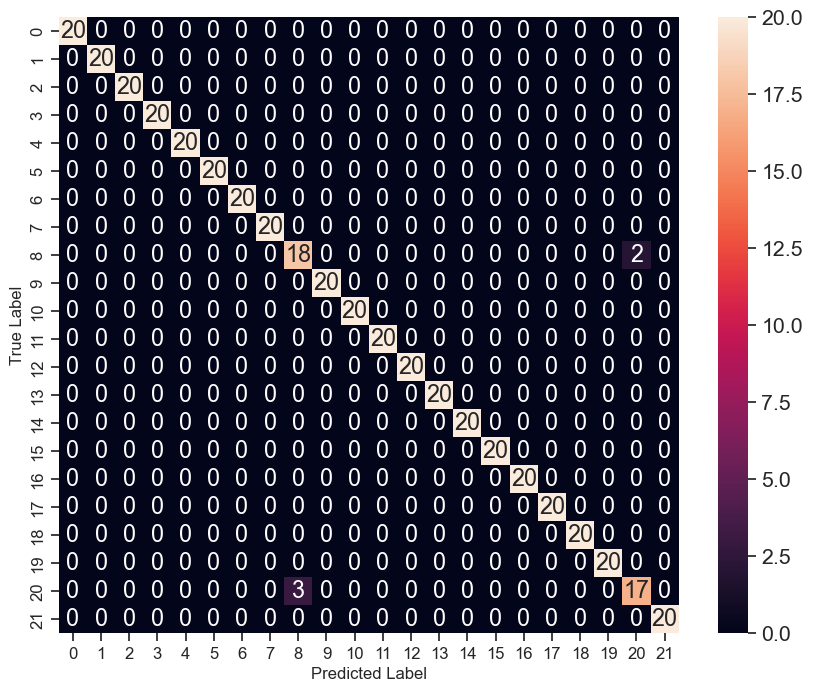

In [42]:
plot_confusion_matrix(y_test, y_hat)
